# **Exploratory Data Analysis (EDA)**

---

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import skew, zscore

## Importing the Dataset

In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [3]:
# Check uploaded file names
import io

# Get the filename automatically from uploaded
filename = next(iter(uploaded))
print("Loaded:", filename)

# Read the CSV into a DataFrame
data = pd.read_csv(io.BytesIO(uploaded[filename]))
data.head()

Loaded: churn.csv


,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploring Categorical Variables


***Analyzing Target Variable `Churn`***

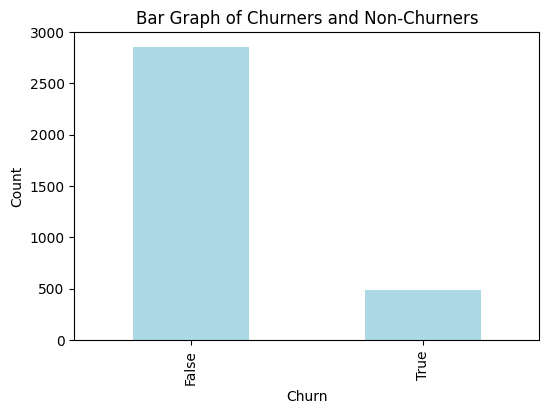

In [4]:
# Summarize the Churn variable
churn_counts = data['Churn'].value_counts()

# Calculate proportion of churners
churn_proportions = data['Churn'].value_counts(normalize=True)

# Bar chart of variable Churn
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['lightblue'])

plt.title("Bar Graph of Churners and Non-Churners")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.ylim(0, 3000)
plt.box(True)  # Add plot box outline
plt.show()

In [5]:
churn_counts = data['Churn'].value_counts()
churn_counts

,count
Churn,
False,2850
True,483


In [6]:
churn_proportions = data['Churn'].value_counts(normalize=True)
churn_proportions

,proportion
Churn,
False,0.855086
True,0.144914


***Analyzing Predictor Categorical Variable `International Plan`***

In [8]:
# Create contingency table (rows=International Plan, columns=Churn) with margins
counts = pd.crosstab(data['Intl Plan'], data['Churn'], margins=True)
counts

Churn,False,True,All
Intl Plan,,,
no,2664,346,3010
yes,186,137,323
All,2850,483,3333


In [10]:
# Create contingency table (rows=International Plan, columns=Churn) WITHOUT margins
counts = pd.crosstab(data['Intl Plan'], data['Churn'], margins=False)


# Create contingency table (proportion)
proportions = counts.div(counts.sum(axis=1), axis=0)
proportions

Churn,False,True
Intl Plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


<Axes: xlabel='Intl Plan'>

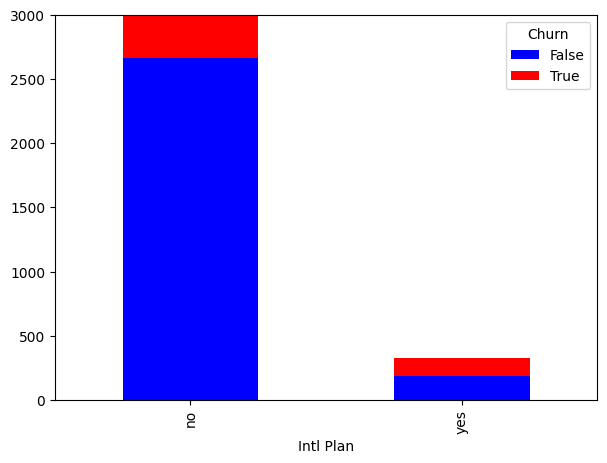

In [11]:
# Plot stacked bar chart for counts
fig, ax = plt.subplots(figsize=(7, 5), facecolor='white')
counts.plot(kind='bar',
            stacked=True,
            color=['blue', 'red'],
            ylim=(0, 3000),
            ax=ax)

<Axes: xlabel='Intl Plan'>

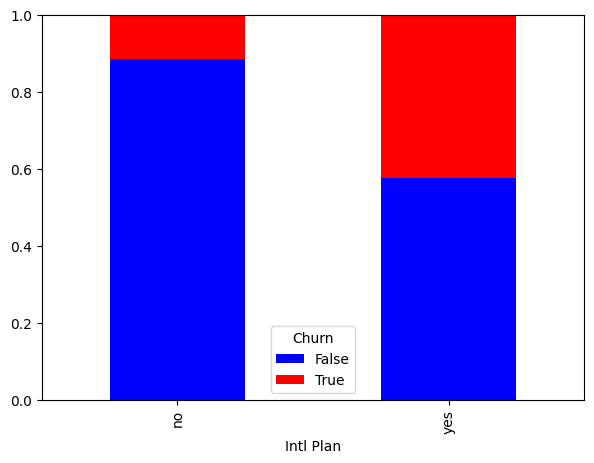

In [12]:
# Plot stacked bar chart for proportions
fig, ax = plt.subplots(figsize=(7, 5), facecolor='white')
proportions.plot(kind='bar', stacked=True, color=['blue', 'red'], ylim=(0, 1), ax=ax)

## Exploring Numeric Variables

In [18]:
# Summary statistics
print(data['CustServ Calls'].describe())

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustServ Calls, dtype: float64


Text(0.5, 0, 'Number of Calls')

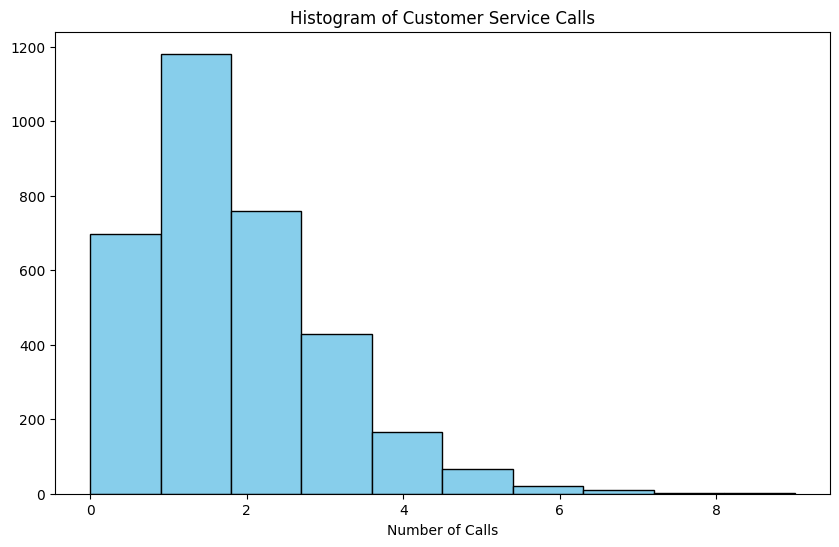

In [22]:
# Plot histogram titled 'Histogram of Customer Service Calls'
plt.figure(figsize=(10, 6))
plt.hist(data['CustServ Calls'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Customer Service Calls")
plt.xlabel("Number of Calls")


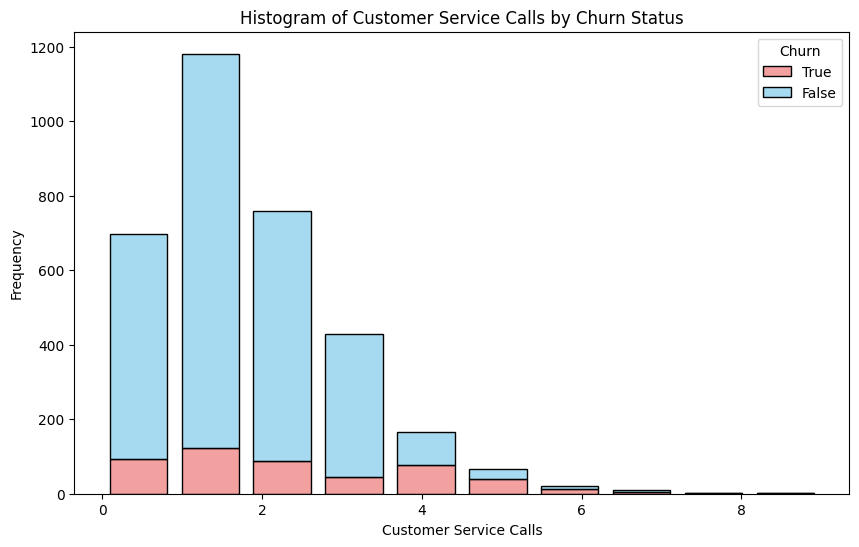

In [30]:
 #Create histogram of 'CustServ Calls' with overlaid 'Churn'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='CustServ Calls', hue='Churn',
    multiple='stack',
    palette={False: 'skyblue', True: 'lightcoral'},
    bins=10,
    shrink=0.8)

plt.title("Histogram of Customer Service Calls by Churn Status")
plt.xlabel("Customer Service Calls")
plt.ylabel("Frequency")
plt.legend(title='Churn', labels=['True', 'False'])
plt.show()

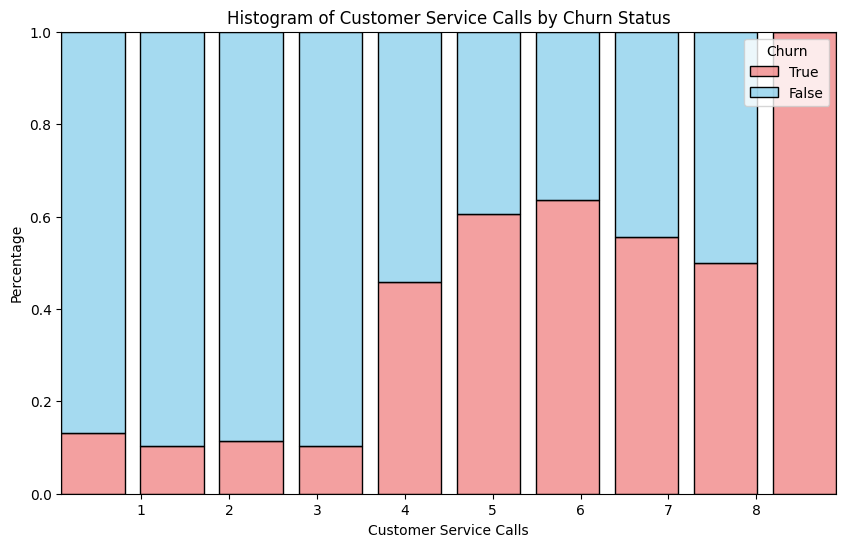

In [31]:
 #Create histogram of 'CustServ Calls' with overlaid 'Churn'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='CustServ Calls', hue='Churn',
    multiple='fill',
    palette={False: 'skyblue', True: 'lightcoral'},
    bins=10,
    shrink=0.8)

plt.title("Histogram of Customer Service Calls by Churn Status")
plt.xlabel("Customer Service Calls")
plt.ylabel("Percentage")
plt.legend(title='Churn', labels=['True', 'False'])
plt.show()

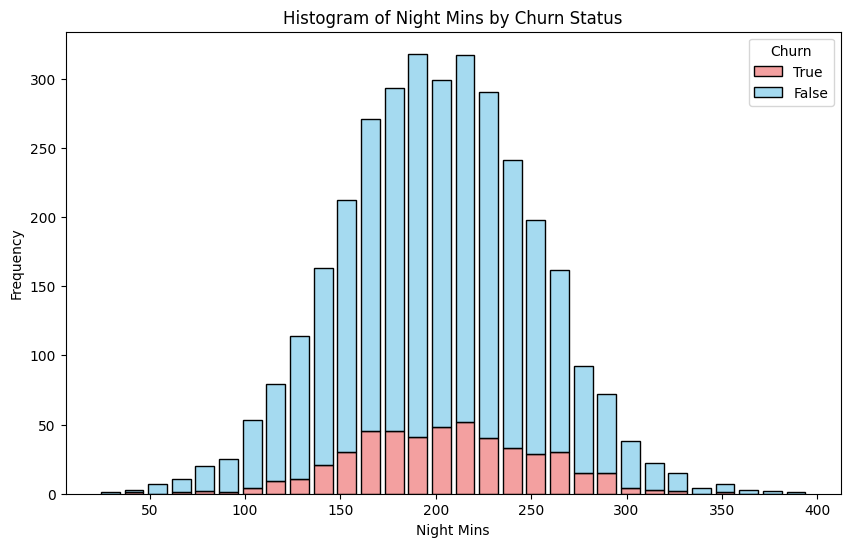

In [36]:
# Boxplot of Churn for Evening Minute
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Night Mins', hue='Churn',
    multiple='stack',
    palette={False: 'skyblue', True: 'lightcoral'},
    bins=30,
    shrink=0.8)

plt.title("Histogram of Night Mins by Churn Status")
plt.xlabel("Night Mins")
plt.ylabel("Frequency")
plt.legend(title='Churn', labels=['True', 'False'])
plt.show()


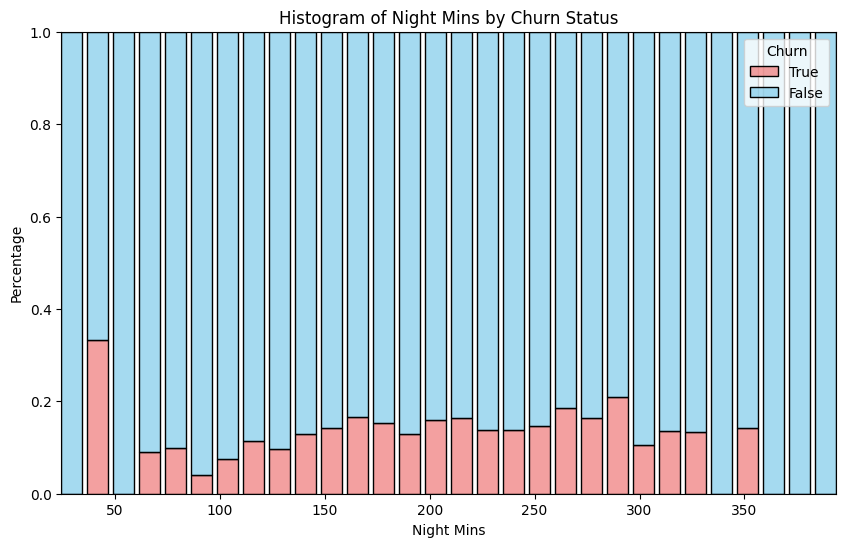

In [35]:
# Boxplot of Churn for Evening Minute
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Night Mins', hue='Churn',
    multiple='fill',
    palette={False: 'skyblue', True: 'lightcoral'},
    bins=30,
    shrink=0.8)

plt.title("Histogram of Night Mins by Churn Status")
plt.xlabel("Night Mins")
plt.ylabel("Percentage")
plt.legend(title='Churn', labels=['True', 'False'])
plt.show()

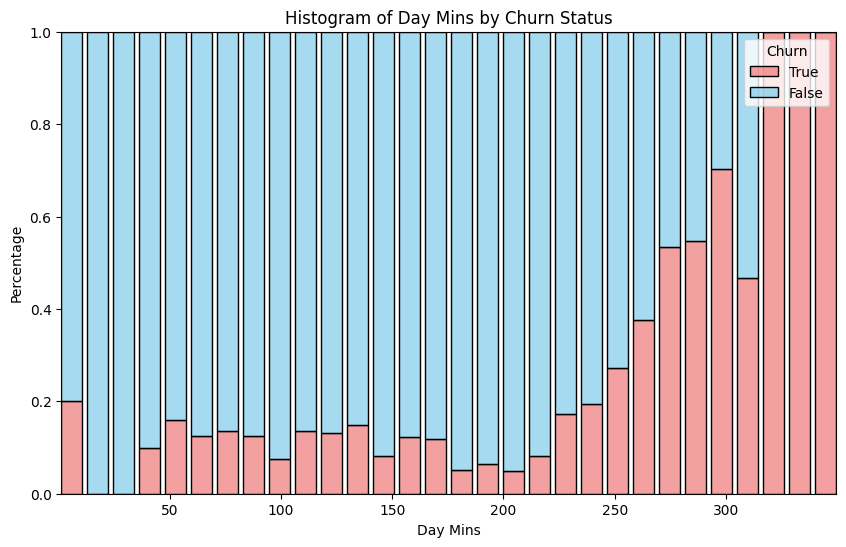

In [38]:
# Boxplot of Churn for Day Minute
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Day Mins', hue='Churn',
    multiple='fill',
    palette={False: 'skyblue', True: 'lightcoral'},
    bins=30,
    shrink=0.8)

plt.title("Histogram of Day Mins by Churn Status")
plt.xlabel("Day Mins")
plt.ylabel("Percentage")
plt.legend(title='Churn', labels=['True', 'False'])
plt.show()

***Using Box plot to gain insight***

<Axes: xlabel='Churn', ylabel='Day Mins'>

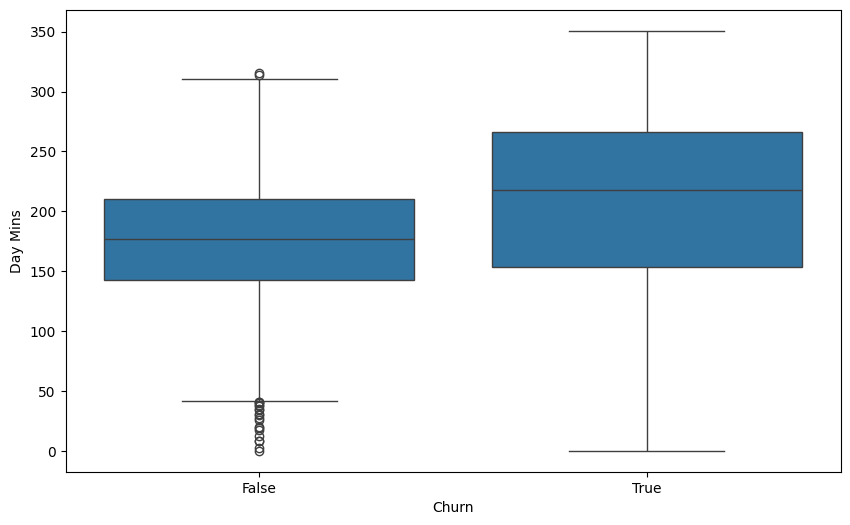

In [39]:
# Boxplot of churn for Evening Minute
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='Day Mins')

## **Exploring Multivariate Relationships**

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

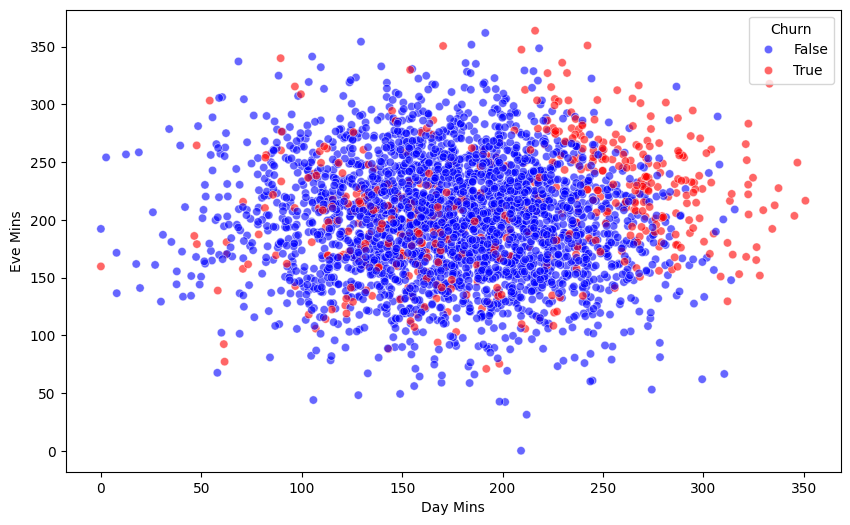

In [40]:
# Scatter plot of Day Mins vs. Eve Mins with Churn indicated by color
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day Mins', y='Eve Mins', hue='Churn', palette={False: 'blue', True: 'red'}, alpha=0.6)

<Axes: xlabel='Day Mins', ylabel='CustServ Calls'>

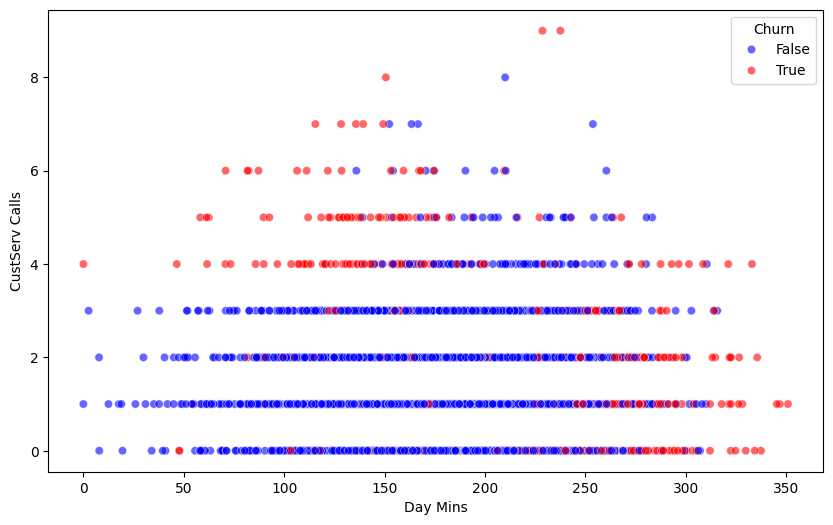

In [42]:
#Scatterplot of Day Minutes and Customer Service Calls, colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Day Mins', y='CustServ Calls', hue='Churn', palette={False: 'blue', True: 'red'}, alpha=0.6)

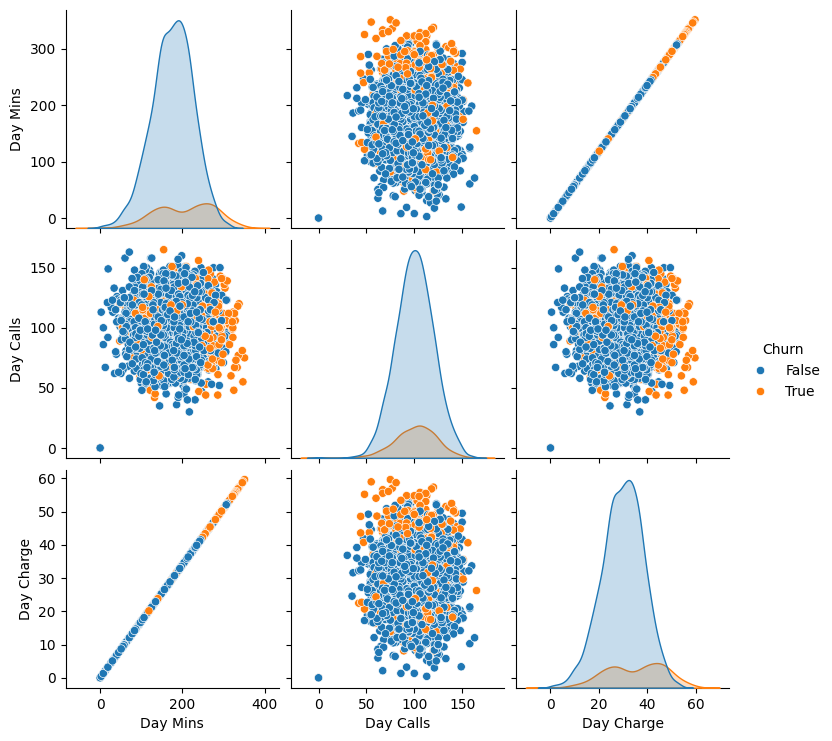

In [44]:
#scatter plot matrix of Day Mins, Day Calls, and Day Charge
sns.pairplot(data, vars=['Day Mins', 'Day Calls', 'Day Charge'], hue='Churn')

In [45]:
#The correlation coefficient between 'Day Calls', 'Day Charge'
correlation_matrix = data[['Day Calls', 'Day Charge']].corr()
correlation_matrix


,Day Calls,Day Charge
Day Calls,1.000000,0.006753
Day Charge,0.006753,1.000000
